### Loading the library

In [1]:
import maboss

This notebook has been executed using the docker image `colomoto/colomoto-docker:2019-07-17`

### Loading the model

In [2]:
model = maboss.load("CellFateModel.bnd", "CellFateModel_1h.cfg")

### Setting simulation parameters

In [3]:
model.param["max_time"] = 100
model.param["sample_count"] = 10000


### Setting initial states

In [4]:
model.network.set_istate("TNF", [1, 0])
model.network.set_istate("FASL", [1, 0])
model.network.set_istate("ATP", [1, 0])

### Settings output nodes

In [5]:
model.network.set_output(["NonACD", "Apoptosis", "Survival"])

### Running the simulation

In [6]:
result = model.run()

### Plotting the asymptotic states distribution

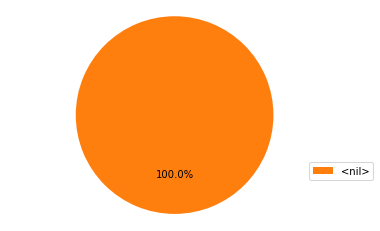

In [7]:
result.plot_piechart()

### Version with TNF

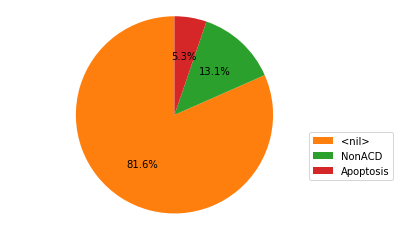

In [8]:
model_TNF = model.copy()
model_TNF.network.set_istate("TNF", [0, 1])
result_TNF = model_TNF.run()
result_TNF.plot_piechart()

### Mutant IKK+,cFLIP+, with TNF

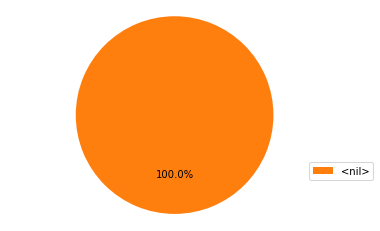

In [9]:
model_mutant_TNF = model_TNF.copy()
model_mutant_TNF.mutate("IKK", "ON")
model_mutant_TNF.mutate("cFLIP", "ON")
result_mutant_TNF = model_mutant_TNF.run()
result_mutant_TNF.plot_piechart()

## UPMaBoSS

In [10]:
up_base_model = model.copy()

up_base_model.param["max_time"] = 1
up_base_model.param["sample_count"] = 10000

up_base_model.param["$TNF_induc"] = 1
up_base_model.param["$TransRate"] = 1/24
up_base_model.param["$DivRate"] = 1/24
up_base_model.param["$Degr_TNF"] = 1/6
up_base_model.param["$ProdTNF_NFkB"] = 1

In [11]:
up_base_model.network.set_istate("TNF", [1, 0])
up_base_model.network.set_istate("FASL", [1, 0])
up_base_model.network.set_istate("ATP", [1, 0])

In [12]:
up_model = maboss.UpdatePopulation(up_base_model)

In [13]:
up_model.setDivisionNode("Division")
up_model.setDeathNode("Death")
up_model.setExternalVariable("$TNF_induc", "$ProdTNF_NFkB*p[(NFkB,Death) = (1,0)]")
up_model.setStepNumber(12)


In [14]:
up_model_res = up_model.run()

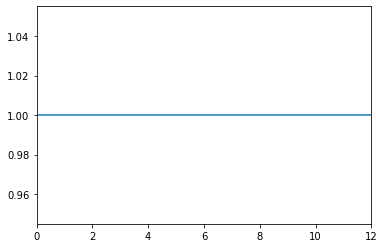

In [15]:
up_model_res.get_population_ratios().plot()

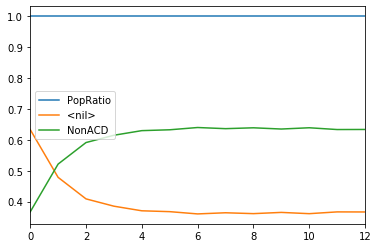

In [16]:
up_model_res.get_stepwise_probability_distribution().plot()